# Prediction using Supervised ML

## Simple Linear Regression 
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


### Importing all the necessary libraries:

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

### Reading the data and storing it in variable df:

In [4]:
df = pd.read_csv("https://bit.ly/3iRkRWd")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Performing EDA on our data:

In [5]:
# checking out the data types
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
# checking if any null values are present
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
# counting the number of records
df.count()

Hours     25
Scores    25
dtype: int64

### Plotting a graph to see if we could manually derive some inference out of it:

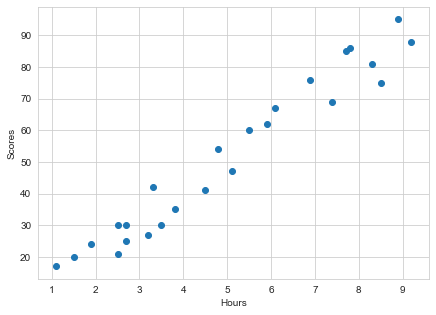

In [25]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(x=df.Hours, y=df.Scores)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.


In [9]:
# The next step is to divide the data into input variable and output variable
x = df.iloc[:,0:1].values
y = df.iloc[:,1].values

### Splitting our dataset into training & testing sets :

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

### Training our algorithm :

In [11]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

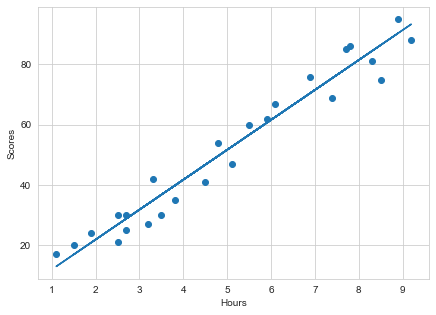

In [26]:
# plotting regression line
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
plt.xlabel("Hours")
plt.ylabel("Scores")
line = reg.coef_*x + reg.intercept_
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

In [13]:
# training score
reg.score(x_train, y_train)

0.9484509249326872

In [14]:
# testing score
reg.score(x_test, y_test)

0.9367661043365056

### Making predictions:

In [15]:
# hour values in our test data
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [18]:
# Depicting actual, predicted and difference in values
y_pred = reg.predict(x_test)
diff = y_test - y_pred
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': diff})  
df1

,Actual,Predicted,Difference
0,20,16.844722,3.155278
1,27,33.745575,-6.745575
2,69,75.500624,-6.500624
3,30,26.786400,3.213600
4,62,60.588106,1.411894
5,35,39.710582,-4.710582
6,24,20.821393,3.178607


In [19]:
# checking out for any specific value. In this case 9.25
hours = 9.25
my_pred = reg.predict([[hours]])
my_pred

array([93.89272889])

### Evaluating our model using various metrics:

In [20]:
# mean sqrd error
metrics.mean_squared_error(y_test,y_pred)

20.33292367497996

In [21]:
# mean absolute error
metrics.mean_absolute_error(y_test,y_pred)

4.130879918502482

In [22]:
# r2 score
metrics.r2_score(y_test,y_pred)

0.9367661043365056